
# By - Yash Khandelwal


In [4]:
!unzip /content/drive/MyDrive/FinalDataset.zip


Archive:  /content/drive/MyDrive/FinalDataset.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     
  inflating: submission.csv          
  inflating: __MACOSX/._submission.csv  


**Importing the libraries**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor, plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import mutual_info_regression, SelectFromModel 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV,Lasso,Ridge,RidgeCV,ElasticNet

In [6]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/submission.csv')

In [7]:
train.shape

(87864, 12)

In [8]:
test.shape

(37656, 12)

In [9]:
train.head(5)

,Item_ID,Item_W,Item_FC,Item_Vis,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales
0,FDU32,21.027499,Regular,0.181327,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,Supermarket Type1,2689.457781
1,NCT54,21.102371,Low Fat,0.185984,Meat,148.250214,OUT035,1987,Small,Tier 1,Supermarket Type1,3437.350375
2,FDW08,20.882263,Low Fat,0.063056,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,Supermarket Type1,3129.967268
3,FDJ22,21.050435,Low Fat,0.080088,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,Supermarket Type1,1306.514376
4,FDF47,21.247876,LF,0.070085,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,Supermarket Type1,1739.769829


In [10]:
test.head(5)

,Item_ID,Item_W,Item_FC,Item_Vis,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales
0,DRM23,10.156725,Low Fat,0.051905,Snack Foods,119.319482,OUT013,1999,High,Tier 3,Supermarket Type1,NaN
1,FDG47,10.434425,Low Fat,0.107947,Household,263.600449,OUT018,1987,High,Tier 3,Supermarket Type1,NaN
2,FDN21,11.953589,Low Fat,0.139692,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1,Supermarket Type1,NaN
3,FDZ23,14.948546,Low Fat,0.111617,Dairy,136.200508,OUT046,2004,Medium,Tier 2,Supermarket Type1,NaN
4,FDC16,11.080042,Low Fat,0.139869,Canned,173.145664,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN


## EDA

In [11]:
train['Item_Vis'].describe()

count    87864.000000
mean         0.090559
std          0.044172
min          0.021537
25%          0.054473
50%          0.080873
75%          0.124222
max          0.186512
Name: Item_Vis, dtype: float64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_FC               87864 non-null  object 
 3   Item_Vis              87864 non-null  float64
 4   Item_Type             87864 non-null  object 
 5   Item_MRP              87864 non-null  float64
 6   Outlet_ID             87864 non-null  object 
 7   Outlet_Year           87864 non-null  int64  
 8   Outlet_Size           87864 non-null  object 
 9   Outlet_Location_Type  87864 non-null  object 
 10  Outlet_Type           87864 non-null  object 
 11  Sales                 87864 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 8.0+ MB


In [13]:
train.columns

Index(['Item_ID', 'Item_W', 'Item_FC', 'Item_Vis', 'Item_Type', 'Item_MRP',
       'Outlet_ID', 'Outlet_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Sales'],
      dtype='object')

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37656 entries, 0 to 37655
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               37656 non-null  object 
 1   Item_W                37656 non-null  float64
 2   Item_FC               37656 non-null  object 
 3   Item_Vis              37656 non-null  float64
 4   Item_Type             37656 non-null  object 
 5   Item_MRP              37656 non-null  float64
 6   Outlet_ID             37656 non-null  object 
 7   Outlet_Year           37656 non-null  int64  
 8   Outlet_Size           37656 non-null  object 
 9   Outlet_Location_Type  37656 non-null  object 
 10  Outlet_Type           37656 non-null  object 
 11  Sales                 0 non-null      float64
dtypes: float64(4), int64(1), object(7)
memory usage: 3.4+ MB


In [15]:
train.isnull().sum()

Item_ID                 0
Item_W                  0
Item_FC                 0
Item_Vis                0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Sales                   0
dtype: int64

In [16]:
test.isnull().sum()

Item_ID                     0
Item_W                      0
Item_FC                     0
Item_Vis                    0
Item_Type                   0
Item_MRP                    0
Outlet_ID                   0
Outlet_Year                 0
Outlet_Size                 0
Outlet_Location_Type        0
Outlet_Type                 0
Sales                   37656
dtype: int64

No null value found!

Sales column in Test data has no use. We'll drop the column.

In [17]:
train['Sales'].skew()

1.125448955321488

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


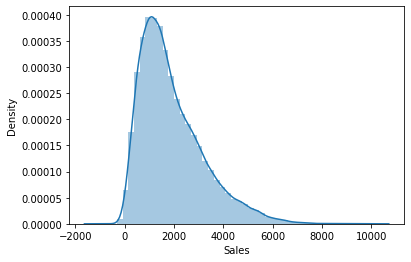

In [18]:
sns.distplot(train['Sales']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


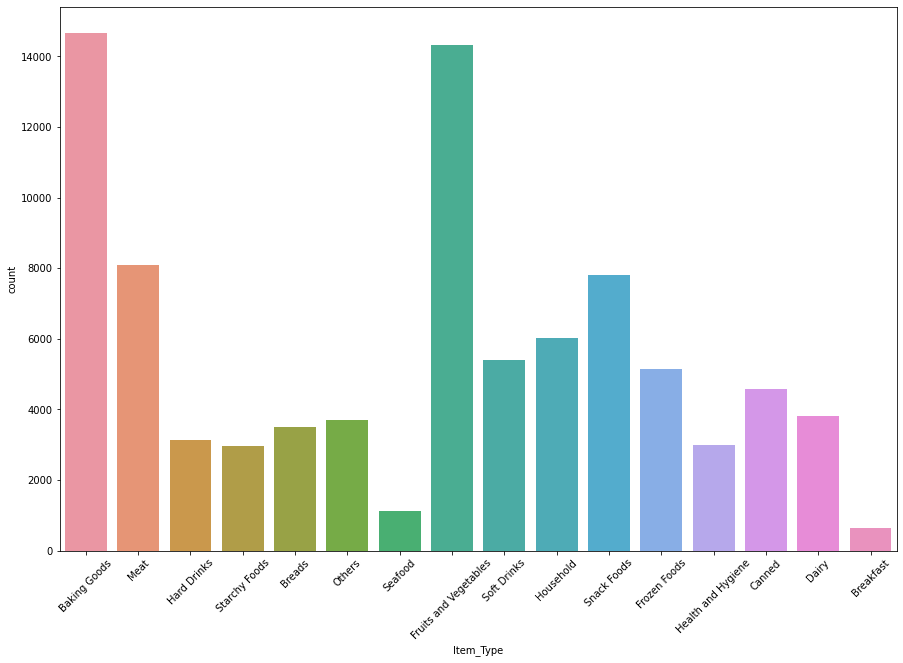

In [19]:
plt.figure(figsize=(15,10))
count = sns.countplot(train['Item_Type'])
count.set_xticklabels(count.get_xticklabels(),rotation = 45);

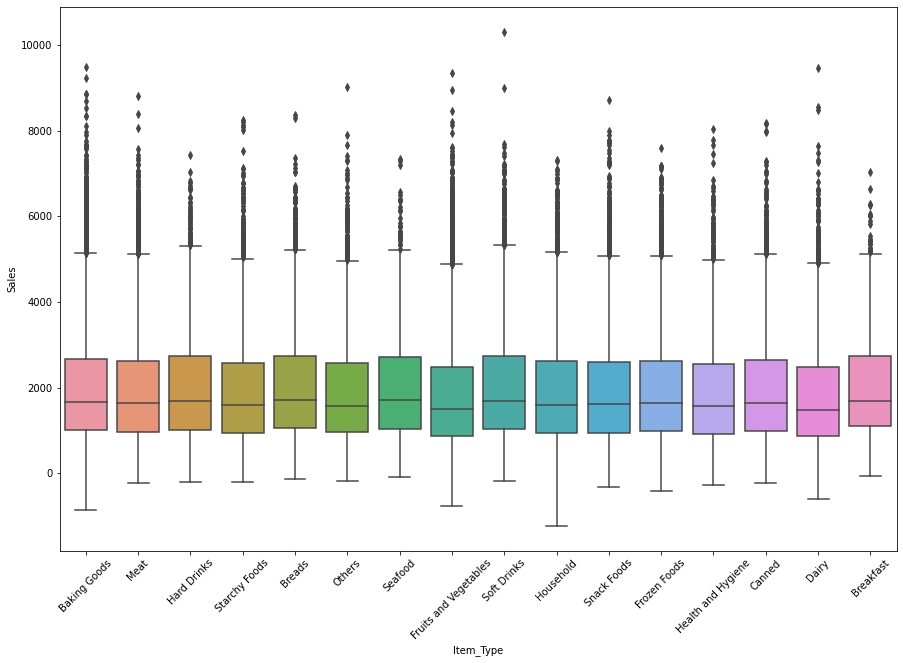

In [20]:
plt.figure(figsize=(15,10))
box = sns.boxplot(x = train['Item_Type'], y = train['Sales']);
box.set_xticklabels(box.get_xticklabels(),rotation = 45);

In [21]:
type1 = train[train['Outlet_Type']=='Supermarket Type1']
type2 = train[train['Outlet_Type']=='Supermarket Type2']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


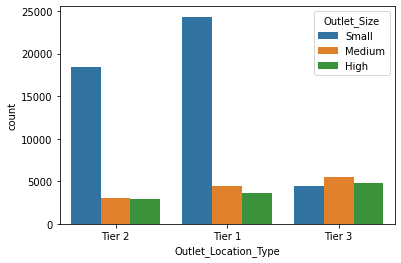

In [22]:
sns.countplot(type1['Outlet_Location_Type'],hue = type1['Outlet_Size']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


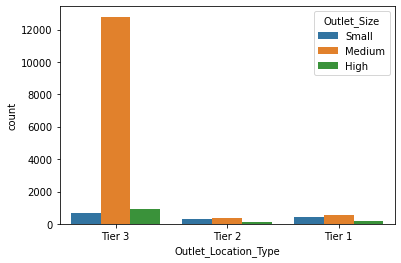

In [23]:
sns.countplot(type2['Outlet_Location_Type'],hue = type2['Outlet_Size']);

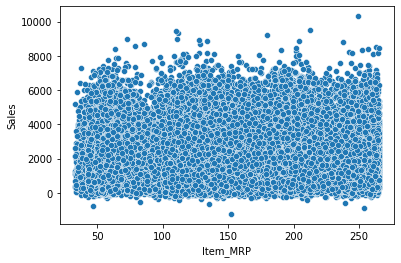

In [24]:
sns.scatterplot(x = train['Item_MRP'],y = train['Sales']);

In [25]:
train['Item_MRP'].corr(train['Sales'])

0.014812567542399348

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


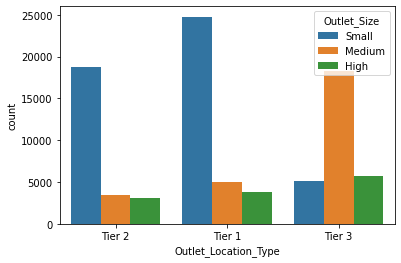

In [26]:
sns.countplot(train['Outlet_Location_Type'],hue = train['Outlet_Size']);

**Outliers**

In [27]:
train['Item_Vis'].describe()

count    87864.000000
mean         0.090559
std          0.044172
min          0.021537
25%          0.054473
50%          0.080873
75%          0.124222
max          0.186512
Name: Item_Vis, dtype: float64

In [28]:
iqr = 0.124222 -  0.054473
ub = 0.124222 + (1.5 * iqr)
lb = 0.054473 - (1.5 * iqr)

train[(train['Item_Vis']<lb) | (train['Item_Vis']>ub)]

,Item_ID,Item_W,Item_FC,Item_Vis,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales


No outliers in Item Visiblity.

In [29]:
train['Sales'].describe()

count    87864.000000
mean      1911.842120
std       1291.386004
min      -1229.360345
25%        959.249675
50%       1606.307877
75%       2608.057736
max      10309.283310
Name: Sales, dtype: float64

In [30]:
#Finding Outliers using interquartile range
iqr = 2608.057736 - 959.249675 #third quartile - first quartile (Q3 - Q1)
ub = 2608.057736 + (1.5 * iqr) #upper bound
lb = 959.249675 - (1.5 * iqr) #lower bound

In [31]:
out = train[(train['Sales']<lb) | (train['Sales']>ub)] 
out

,Item_ID,Item_W,Item_FC,Item_Vis,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales
13,FDG32,21.106734,Low Fat,0.104697,Baking Goods,129.801533,OUT046,1997,Small,Tier 3,Supermarket Type1,6379.790499
30,FDT34,20.945943,Regular,0.093528,Meat,142.596486,OUT046,1997,Small,Tier 1,Supermarket Type1,6741.017116
33,FDO32,20.878962,Regular,0.102225,Baking Goods,140.917274,OUT035,2008,Small,Tier 2,Supermarket Type1,6198.371937
228,NCC42,21.131428,Low Fat,0.084917,Breads,245.319470,OUT013,1999,Small,Tier 2,Supermarket Type1,5794.834611
246,FDS57,20.960609,Regular,0.072494,Baking Goods,128.509833,OUT046,1996,Small,Tier 2,Supermarket Type1,8699.342857
...,...,...,...,...,...,...,...,...,...,...,...,...
87746,DRK12,16.613151,Low Fat,0.172282,Dairy,152.953315,OUT018,2009,Medium,Tier 3,Supermarket Type2,5145.665334
87752,FDM58,18.346853,Low Fat,0.053629,Dairy,225.020932,OUT018,2009,Medium,Tier 3,Supermarket Type1,5392.408338
87762,FDC17,13.373157,Regular,0.139430,Snack Foods,193.711896,OUT049,1999,Medium,Tier 1,Supermarket Type1,6243.916532
87791,DRC27,13.800000,Low Fat,0.058193,Dairy,246.980200,OUT049,1999,Medium,Tier 1,Supermarket Type1,5896.324800


Total outleirs in Sales -> 2378

# Data Preprocessing

In [32]:
cat_l = []
num_l = []
for i in train.columns:
  if(train[i].dtype=='object'):
    cat_l.append(i)
  else:
    num_l.append(i)

In [33]:
cat_l

['Item_ID',
 'Item_FC',
 'Item_Type',
 'Outlet_ID',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [34]:
num_l

['Item_W', 'Item_Vis', 'Item_MRP', 'Outlet_Year', 'Sales']

**Categorical Encoding** -
1. Item_type, Outlet_id, Outlet_year, Outlet_Type - One Hot Encoding
2. Outlet_Size, Outlet_location_type, Item_FC - Ordinal Encoding


In [35]:
one_hot_l = ['Item_Type','Outlet_Year','Outlet_ID','Outlet_Type']

In [36]:
###Train- One hot encoding#####
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
dummy_df = pd.DataFrame(encoder.fit_transform((train[one_hot_l])))
dummy_df.index = train.index
dummy_df.columns = encoder.get_feature_names(one_hot_l)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
train.drop(one_hot_l,axis=1,inplace = True)
train = pd.concat([train,dummy_df],axis=1)

In [38]:
###Test - One Hot Encoding#####
dummy_df = pd.DataFrame(encoder.transform((test[one_hot_l])))
dummy_df.index = test.index
dummy_df.columns = encoder.get_feature_names(one_hot_l)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
test.drop(one_hot_l,axis=1,inplace = True)
test = pd.concat([test,dummy_df],axis=1)

In [40]:
print(train.shape)
print(test.shape)

(87864, 43)
(37656, 43)


In [41]:
print(train['Outlet_Size'].value_counts())
print("\n")
print(test['Outlet_Size'].value_counts())

Small     48614
Medium    26683
High      12567
Name: Outlet_Size, dtype: int64


Medium    15236
Small     13504
High       8916
Name: Outlet_Size, dtype: int64


In [42]:
print(train['Outlet_Location_Type'].value_counts())
print("\n")
print(test['Outlet_Location_Type'].value_counts())

Tier 1    33567
Tier 3    29044
Tier 2    25253
Name: Outlet_Location_Type, dtype: int64


Tier 3    15732
Tier 1    12830
Tier 2     9094
Name: Outlet_Location_Type, dtype: int64


In [43]:
print(train['Item_FC'].value_counts())
print("\n")
print(test['Item_FC'].value_counts())

Low Fat    46761
Regular    32214
LF          5858
low fat     2098
reg          933
Name: Item_FC, dtype: int64


Low Fat    20853
Regular    13342
LF          2177
low fat      891
reg          393
Name: Item_FC, dtype: int64


Here "Low Fat" is same as "low fat", "Regular" is same as "reg". Here, "LF" would be "Large Fat".

In [44]:
###making this change in Item_FC###
train['Item_FC'] = train['Item_FC'].apply(lambda x : "Low Fat" if x=="low fat" else ("Regular" if x=="reg" else x))
test['Item_FC'] = test['Item_FC'].apply(lambda x : "Low Fat" if x=="low fat" else ("Regular" if x=="reg" else x))

In [45]:
train['Item_FC'] = train['Item_FC'].apply(lambda x : "Low Fat" if x=="LF" else x)
test['Item_FC'] = test['Item_FC'].apply(lambda x : "Low Fat" if x=="LF" else x) 

In [46]:
print(train['Item_FC'].value_counts())

Low Fat    54717
Regular    33147
Name: Item_FC, dtype: int64


In [47]:
### Train Ordinal Encoding ###
size_d = {'Small' : 0,'Medium' : 1, 'High' : 2} #High > Medium > Small
tier_d = {'Tier 3' : 0, 'Tier 2' : 1, 'Tier 1' : 2} #Tier 1 > Tier 2 > Tier 3
fat_d = {'Low Fat' : 0, 'Regular' : 1} #Regular Fat Content > Low Fat Content

train['Outlet_Size'] = train['Outlet_Size'].map(size_d)
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].map(tier_d)
train['Item_FC'] = train['Item_FC'].map(fat_d)


In [48]:
## Test ordinal Encoding
test['Outlet_Size'] = test['Outlet_Size'].map(size_d)
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].map(tier_d)
test['Item_FC'] = test['Item_FC'].map(fat_d)

# Feature Engineering

In [49]:
train['Item_ID'].nunique()

895

Also an individual product maybe cosutmer favourite. So we use item_id feature.

**Item ID Type**

In [50]:

train['item_id_type'] = train['Item_ID'].apply(lambda x : str(x[0:3]))
test['item_id_type'] = test['Item_ID'].apply(lambda x : str(x[0:3]))


In [51]:

#ordinal encoding of item_id_type on Item_MRP
ordinal_labels=train.groupby(['item_id_type'])['Item_MRP'].mean().sort_values().index
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}


In [52]:

#train
train['item_id_type'] = train['item_id_type'].map(ordinal_labels2)
#test
test['item_id_type'] = test['item_id_type'].map(ordinal_labels2)


**Years from the present**

In [53]:

temp1 = pd.read_csv('/content/train.csv')
temp2 = pd.read_csv('/content/test.csv')
train['Years_from_present'] = temp1['Outlet_Year'].apply(lambda x: 2021 - x)
test['Years_from_present'] = temp2['Outlet_Year'].apply(lambda x: 2021 - x)


# Modeling

In [54]:
train.drop('Item_ID',axis=1,inplace=True)
test.drop(['Item_ID','Sales'],axis=1,inplace=True)

In [55]:
X = train.drop('Sales',axis=1)
y = train['Sales']

In [56]:
def rmse(X,y):
  return np.sqrt(mean_squared_error(X,y))

In [57]:
X.columns

Index(['Item_W', 'Item_FC', 'Item_Vis', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Year_1987', 'Outlet_Year_1988',
       'Outlet_Year_1996', 'Outlet_Year_1997', 'Outlet_Year_1998',
       'Outlet_Year_1999', 'Outlet_Year_2003', 'Outlet_Year_2004',
       'Outlet_Year_2005', 'Outlet_Year_2007', 'Outlet_Year_2008',
       'Outlet_Year_2009', 'Outlet_ID_OUT013', 'Outlet_ID_OUT018',
       'Outlet_ID_OUT035', 'Outlet_ID_OUT046', 'Outlet_ID_OUT049',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'item_id_type', 'Yea

In [58]:
X.shape

(87864, 43)

In [59]:
xgr = XGBRegressor()
las = Lasso()
rid = Ridge()
lgbm = LGBMRegressor()

In [60]:
for i in [las,rid,lgbm,xgr]:
  print(cross_val_score(i,X,y,cv = 5,scoring = make_scorer(rmse)).mean())

1274.5638098017175
1274.4788487667515
1275.7327833293318
[10:26:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:26:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:26:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:26:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1274.0950052700143


**Feature Importance**

[10:27:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


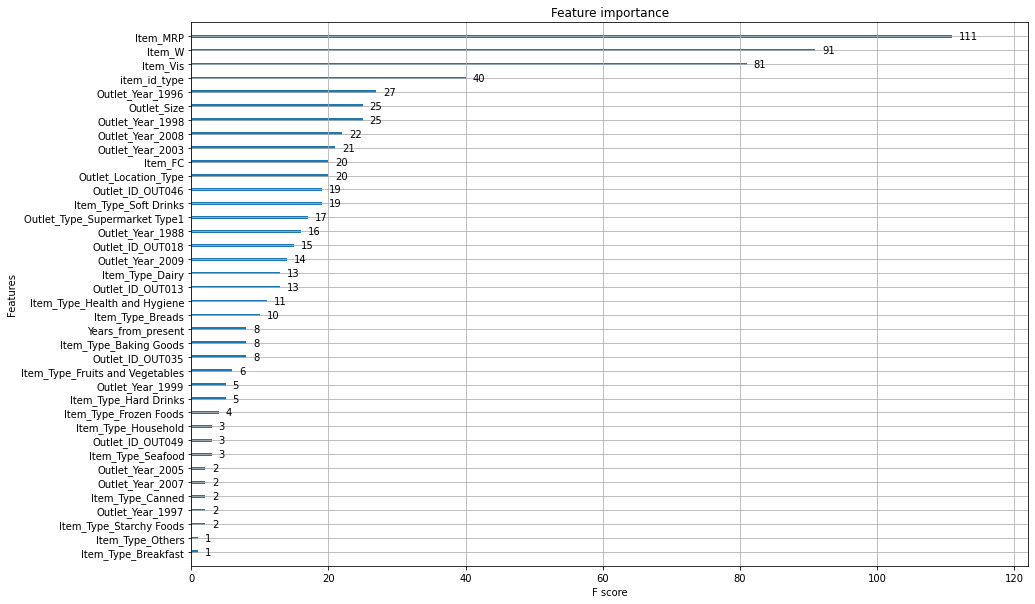

In [61]:
#feature importance xgboost
from xgboost import plot_importance
xgb = XGBRegressor()
xgb.fit(X,y)
fig, ax = plt.subplots(figsize=(15, 10))
plot_importance(xgb, ax=ax)

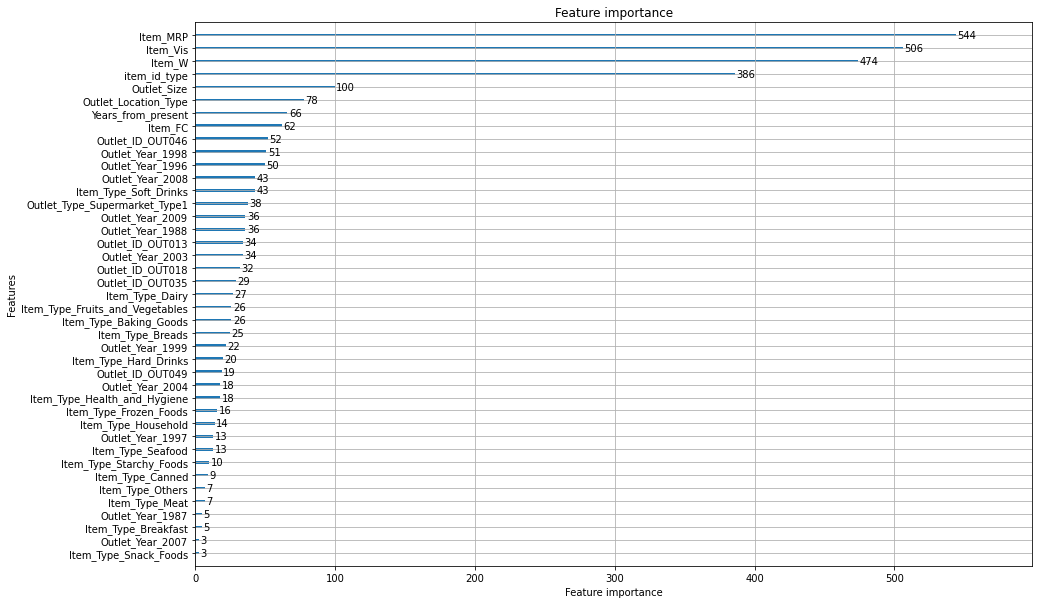

In [62]:
from lightgbm import plot_importance
lgbm = LGBMRegressor()
lgbm.fit(X,y)
fig, ax = plt.subplots(figsize=(15, 10))
plot_importance(lgbm, ax=ax)

# Stacking Ensemble

In [63]:
from sklearn.ensemble import StackingRegressor
lr = LinearRegression()

In [64]:
xgr = XGBRegressor()
las = Lasso()
rid = Ridge()
lgbm = LGBMRegressor()
reg = [('las',las),('lgbm',lgbm),('xgr',xgr),('rid',rid)]
stack_model = StackingRegressor(estimators = reg,final_estimator = lr)

In [65]:
 print(cross_val_score(stack_model,X,y,cv = 5,scoring = make_scorer(rmse)).mean())

[10:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [66]:
stack_model.fit(X,y)

[10:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(estimators=[('las', Lasso()), ('lgbm', LGBMRegressor()),
                              ('xgr', XGBRegressor()), ('rid', Ridge())],
                  final_estimator=LinearRegression())

Submission

In [68]:
sub_df = pd.DataFrame()
ans = stack_model.predict(test)
sub_df['Sales'] = ans

sub_df.to_csv('fsubmission28.csv',index = False)